In [1]:
import pandas as pd
import numpy as np

# 1- Etude du dataset sur les entraineurs 

In [4]:
df = pd.read_json('coaches.json')

In [5]:
df.shape

(208, 9)

In [6]:
df.head()

,wyId,shortName,firstName,middleName,lastName,birthDate,birthArea,passportArea,currentTeamId
0,275580,Cesar Domingo,César Domingo,,Mendiondo López,None,"{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...","{'id': 76, 'alpha2code': 'BR', 'alpha3code': '...",0
1,14710,J. Heynckes,Josef,,Heynckes,1945-05-09,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...",0
2,135480,G. De Biasi,Giovanni,,De Biasi,1956-06-16,"{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...","{'id': 380, 'alpha2code': 'IT', 'alpha3code': ...",0
3,210074,Marcelino,Marcelino,,García Toral,1965-08-14,"{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...","{'id': 724, 'alpha2code': 'ES', 'alpha3code': ...",674
4,293398,T. Korkut,Tayfun,,Korkut,1974-04-02,"{'id': 276, 'alpha2code': 'DE', 'alpha3code': ...","{'id': 792, 'alpha2code': 'TR', 'alpha3code': ...",0


In [7]:
coaches = df[['shortName', 'currentTeamId']]

In [8]:
coaches.shape #Même nombre de ligne que le dataset coaches, tout va bien 

(208, 2)

In [9]:
retired = df[df['currentTeamId'] == 0] #dataFrame des entraineurs libres
active = df[df['currentTeamId'] != 0] #dataFrame des entraineurs sous contrat

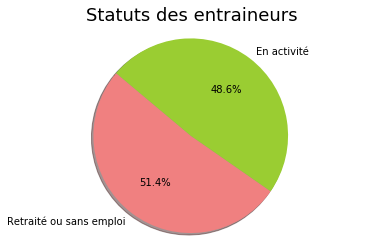

In [13]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Retraité ou sans emploi', 'En activité'

sizes = [retired.shape[0], active.shape[0]]
colors = ['lightcoral', 'yellowgreen']
explode = (0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Statuts des entraineurs', fontsize=18)
plt.show()

In [18]:
#On créé le dataFrame des nationalité à partir du dataset original.
nation = pd.DataFrame(list(df['passportArea']),
                     columns=['name'])

In [24]:
nation.shape

(208, 1)

In [25]:
nation.head()

,name
0,Brazil
1,Germany
2,Italy
3,Spain
4,Turkey


In [34]:
#Création de la serie qui contiendra le nom du pays d'origine de l'entraineur en index
#et son nombre d'occurence en valeurs.
count_country = nation['name'].value_counts()

In [38]:
count_country

Spain               40
Italy               33
France              27
Germany             23
England             11
Argentina           10
Portugal             6
Croatia              6
Netherlands          5
Switzerland          4
Uruguay              4
Sweden               3
Wales                3
Austria              2
Serbia               2
Northern Ireland     2
Brazil               2
Russia               2
Turkey               2
Scotland             2
Colombia             2
Slovakia             1
United States        1
Armenia              1
Ukraine              1
Costa Rica           1
Iceland              1
Hungary              1
Senegal              1
Romania              1
Ireland Republic     1
Korea Republic       1
Czech Republic       1
Norway               1
Japan                1
Poland               1
Belgium              1
Tunisia              1
Name: name, dtype: int64

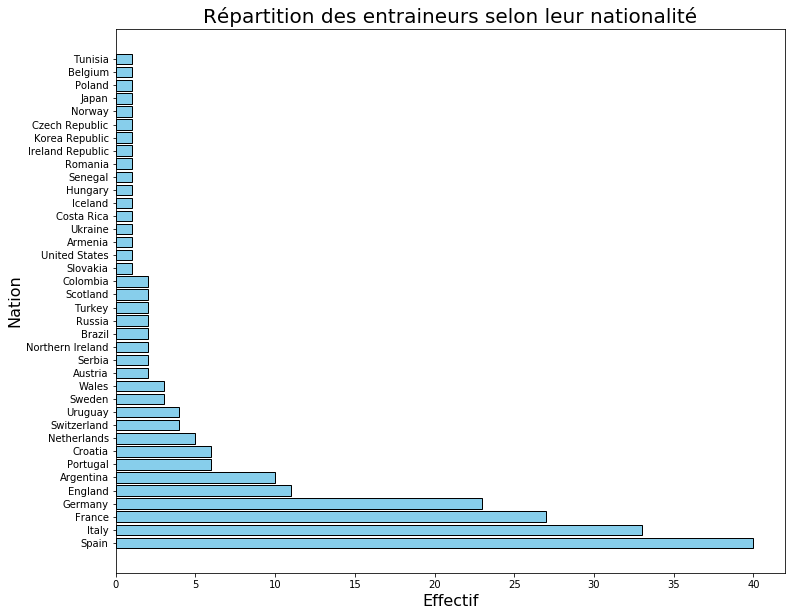

In [41]:
import matplotlib.pyplot as plt

#Data to plot
country = count_country.index.tolist()
pos = np.arange(len(country))
effectif= count_country.values.tolist()

plt.figure(figsize=(12,10))
plt.barh(pos,effectif,color='skyblue',edgecolor='black')
plt.yticks(pos, country)
plt.xlabel('Effectif', fontsize=16)
plt.ylabel('Nation', fontsize=16)
plt.title('Répartition des entraineurs selon leur nationalité',fontsize=20)
plt.show()

# 2- Etude du dataset sur les clubs

In [42]:
teams = pd.read_json('teams.json')

In [43]:
teams.shape

(142, 6)

In [44]:
teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [45]:
#Création du dataFrame contenant le pays du club
location = pd.DataFrame(list(teams['area']),
                             columns=['name'])

In [48]:
location.shape

(142, 1)

In [49]:
location.head()

,name
0,England
1,Spain
2,Spain
3,Spain
4,Spain


In [50]:
#Comme on va concaténer les dataFrame location et teams qui contiennent tous les 2 la colonne 'name' on renomme
#celle de location en 'location'
location.rename(columns={'name':'location'}, inplace=True)

In [53]:
location.columns

Index(['location'], dtype='object')

In [55]:
teams_location = pd.concat([teams, location], axis=1) #concaténation suivant les colonnes: axe 1

In [56]:
teams_location.shape

(142, 7)

In [58]:
teams_location.head()

,city,name,wyId,officialName,area,type,location
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club,Spain


In [59]:
#Maintenant on peut facilement récupérer les lignes relatives à des clubs de Premier League.
#On oublie pas le club de Swansea qui est localisé au Pays de Galles mais qui évolue en Premier League.
#Et on précise également qu'on veut seulement les clubs, pas les sélections nationales.
epl_team = teams_location[((teams_location['location'] == 'England') | (teams_location['location'] =='Wales')) & (teams_location['type'] == 'club')]

In [61]:
epl_team.shape #20 lignes = 20 clubs, tout va bien

(20, 7)

In [62]:
epl_team

,city,name,wyId,officialName,area,type,location
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
8,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
19,Swansea,Swansea City,10531,Swansea City AFC,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",club,Wales
26,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
27,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
39,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
54,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
55,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
56,Stoke-on-Trent,Stoke City,1639,Stoke City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
60,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England


In [63]:
df_epl = pd.read_excel('epl_club_location.xlsx')

In [64]:
df_epl

,longitude,latitude,color
0,-1.613157,54.973847,black
1,-1.782248,53.646665,cornflowerblue
2,-3.945925,51.619596,papayawhip
3,-1.901916,50.728777,crimson
4,0.121487,50.783579,aqua
5,-2.243920,53.790726,firebrick
6,-1.133079,52.636140,blue
7,-0.016350,51.538460,dodgerblue
8,-2.181261,53.016201,deeppink
9,-0.395742,51.655388,yellow


In [70]:
epl_team.index = pd.RangeIndex(len(epl_team.index)) #On réorganise les index pour qu'ils soient les mêmes que ceux de df_epl

In [71]:
epl_team

,city,name,wyId,officialName,area,type,location
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
1,"Huddersfield, West Yorkshire",Huddersfield Town,1673,Huddersfield Town FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
2,Swansea,Swansea City,10531,Swansea City AFC,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",club,Wales
3,"Bournemouth, Dorset",AFC Bournemouth,1659,AFC Bournemouth,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
4,"Brighton, East Sussex",Brighton & Hove Albion,1651,Brighton & Hove Albion FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
5,"Burnley, Lancashire",Burnley,1646,Burnley FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
6,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
7,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
8,Stoke-on-Trent,Stoke City,1639,Stoke City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England
9,Watford,Watford,1644,Watford FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club,England


C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


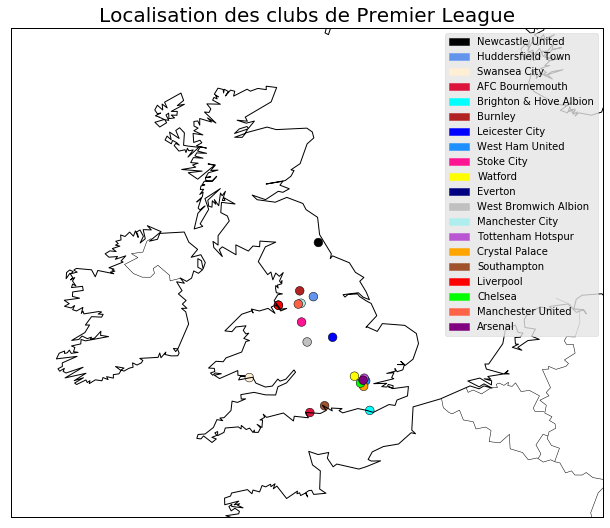

In [150]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

rcParams['text.color'] = 'black'

fig=plt.figure(figsize=(12,9))

map = Basemap(projection='mill',
              llcrnrlat=48,
              urcrnrlat=60,
              llcrnrlon=-12,
              urcrnrlon=8,
              resolution='l')

map.drawmapboundary(fill_color='white')
map.drawcoastlines()
map.drawcountries(color='k')

sites_lat_y = df_epl['latitude'].tolist()
sites_lon_x = df_epl['longitude'].tolist()
colors = df_epl['color'].tolist()

map.scatter(sites_lon_x, sites_lat_y, color=colors, latlon=True, s=300, marker='.', edgecolor='k')

patches = [mpatches.Patch(color=df_epl.at[i,'color'], label=epl_team.at[i,'name']) for i in range(len(colors))]

plt.legend(handles=patches)

plt.title('Localisation des clubs de Premier League', fontsize=20)

plt.show()

# 3- Etude du dataset sur les matchs

In [87]:
matches = pd.read_json('matches_England.json')

In [88]:
matches.shape

(380, 14)

In [89]:
matches #Déjà on remarque que la colonne gameweek commence par la journée 38 jusqu'à la journée 1.

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Played,4405654,1,"{'1623': {'scoreET': 0, 'coachId': 268779, 'si...",181150,2017-08-12 14:00:00,1623,Goodison Park,2499723,"Everton - Stoke City, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364
376,Played,4405654,1,"{'10531': {'scoreET': 0, 'coachId': 381291, 's...",181150,2017-08-12 14:00:00,0,St. Mary's Stadium,2499726,"Southampton - Swansea City, 0 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 385916, 'role': 'referee'}, {'r...",Regular,364
377,Played,4405654,1,"{'1659': {'scoreET': 0, 'coachId': 8934, 'side...",181150,2017-08-12 14:00:00,1627,The Hawthorns,2499728,"West Bromwich Albion - AFC Bournemouth, 1 - 0","August 12, 2017 at 4:00:00 PM GMT+2","[{'refereeId': 379443, 'role': 'referee'}, {'r...",Regular,364
378,Played,4405654,1,"{'1644': {'scoreET': 0, 'coachId': 71037, 'sid...",181150,2017-08-12 11:30:00,0,Vicarage Road Stadium,2499727,"Watford - Liverpool, 3 - 3","August 12, 2017 at 1:30:00 PM GMT+2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",Regular,364


In [90]:
#Les 6 lignes suivantes constituent des tests pour comprendre comment manipuler les données du dataset,
#ne pas prendre en compte dans la lecture

In [91]:
df = matches[(matches['label'].str.contains('Liverpool'))]['winner'].values

In [92]:
df.shape

(38,)

In [93]:
df2 = df.reshape(df.shape[0], 1) #

In [94]:
df2.shape

(38, 1)

In [95]:
df2[0]

array([1612], dtype=int64)

In [96]:
df2[0][0]

1612

In [97]:
def points(id, team):
    pts = []
    
    #On récupère sous forme de liste les id de l'équipe vainqueur pour chaque match de l'équipe passé en paramètre.
    df = matches[(matches['label'].str.contains(team))]['winner'].values.tolist()
    
    #On parcourt cette liste et on ajoute 3 points si l'équipe a gagné, 1 si match nul, 0 si l'équipe a perdu.
    #On parcourt la liste à l'envers pour commencer par la première journée de championnat.
    for i in range(len(df), 0, -1):
        if i==len(df):
            if df[i-1]==id:
                pts.append(3)
            elif df[i-1]==0:
                pts.append(1)
            else:
                pts.append(0)
        
        else:
            if df[i-1]==id:
                pts.append(pts[len(df)-1-i]+3)
            elif df[i-1]==0:
                pts.append(pts[len(df)-1-i]+1)
            else:
                pts.append(pts[len(df)-1-i]+0)
    
    return pts

In [98]:
teams = pd.read_json('teams.json')

In [99]:
#On récupère les id de chaque club du Big Six...

In [100]:
id_liverpool = int(teams[teams['name'] == 'Liverpool']['wyId'])
id_mancity = int(teams[teams['name'] == 'Manchester City']['wyId'])
id_manutd = int(teams[teams['name'] == 'Manchester United']['wyId'])
id_chelsea = int(teams[teams['name'] == 'Chelsea']['wyId'])
id_arsenal = int(teams[teams['name'] == 'Arsenal']['wyId'])
id_tottenham = int(teams[teams['name'] == 'Tottenham Hotspur']['wyId'])

In [101]:
#... puis on calcule leurs points avec la fonction précédemment créée.

In [102]:
pts_liverpool = points(id_liverpool, 'Liverpool')
pts_mancity = points(id_mancity, 'Manchester City')
pts_manutd = points(id_manutd, 'Manchester United')
pts_chelsea = points(id_chelsea, 'Chelsea')
pts_arsenal = points(id_arsenal, 'Arsenal')
pts_tottenham = points(id_tottenham, 'Tottenham Hotspur')

In [103]:
#Et enfin on réalise le graphique sur la saison entière

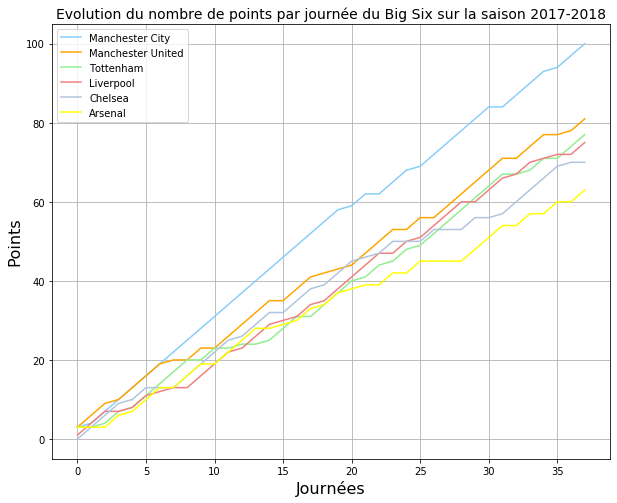

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

x = range(0, 38, 1)

plt.plot(x, pts_mancity, label='Manchester City', color='lightskyblue')
plt.plot(x, pts_manutd, label='Manchester United', color='orange')
plt.plot(x, pts_tottenham, label='Tottenham', color='lightgreen')
plt.plot(x, pts_liverpool, label='Liverpool', color='lightcoral')
plt.plot(x, pts_chelsea, label='Chelsea', color='lightsteelblue')
plt.plot(x, pts_arsenal, label='Arsenal', color='yellow')

plt.xlabel('Journées', fontsize=16)
plt.ylabel('Points', fontsize=16)

plt.legend()
plt.title('Evolution du nombre de points par journée du Big Six sur la saison 2017-2018', fontsize=14)
plt.grid(True)
plt.show()

# 4- Etude du dataset events

In [105]:
events = pd.read_json('events_England.json')

In [106]:
events.shape #Beaucoup plus de données que dans les dataset précédents.

(643150, 12)

In [107]:
events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [108]:
#On reprend l'id trouvé dans la partie 3 pour créer un masque sur le dataFrame events
events_mancity = events[events['teamId'] == id_mancity]

In [109]:
events_mancity.shape

(41216, 12)

In [110]:
events_mancity.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296


In [115]:
s=0
l=[]
for tag in events_mancity['tags']:
    for i in tag:
        if i['id'] == 101:
            l.append(True)
            s=1
    if s==0:
        l.append(False)
    s=0

events_mancity['goal']=l

C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [117]:
events_mancity.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False


In [118]:
#On garde seulement les lignes relatives aux buts en utilisant un masque.
goals_mancity = events_mancity[events_mancity['goal'] == True]
goals_mancity

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
2982,10,Shot,"[{'id': 101}, {'id': 1901}, {'id': 402}, {'id'...",8325,"[{'y': 55, 'x': 89}, {'y': 100, 'x': 100}]",2499720,Shot,1625,2H,1455.304065,100,178148575,True
24815,9,Reflexes,"[{'id': 101}, {'id': 1202}, {'id': 1802}]",71654,"[{'y': 0, 'x': 0}, {'y': 42, 'x': 10}]",2499734,Save attempt,1625,1H,2076.817580,90,180842416,True
25561,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",11066,"[{'y': 49, 'x': 90}, {'y': 0, 'x': 0}]",2499734,Shot,1625,2H,2216.138172,100,180843201,True
32640,9,Save attempt,"[{'id': 101}, {'id': 1209}, {'id': 1802}]",71654,"[{'y': 100, 'x': 100}, {'y': 73, 'x': 6}]",2499739,Save attempt,1625,1H,724.232855,91,182135915,True
32813,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",340386,"[{'y': 51, 'x': 88}, {'y': 100, 'x': 100}]",2499739,Shot,1625,1H,1250.893682,100,182136124,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608283,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",245364,"[{'y': 72, 'x': 81}, {'y': 100, 'x': 100}]",2500078,Shot,1625,1H,724.868615,100,247535050,True
608744,9,Save attempt,"[{'id': 101}, {'id': 1206}, {'id': 1802}]",71654,"[{'y': 100, 'x': 100}, {'y': 29, 'x': 18}]",2500078,Save attempt,1625,1H,2486.567508,91,247535559,True
609053,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",340386,"[{'y': 46, 'x': 95}, {'y': 100, 'x': 100}]",2500078,Shot,1625,2H,424.948827,100,247535909,True
609273,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",105339,"[{'y': 54, 'x': 86}, {'y': 100, 'x': 100}]",2500078,Shot,1625,2H,1123.686123,100,247536232,True


In [121]:
goals_mancity.shape

(129, 13)

In [122]:
goals_mancity['subEventName'].value_counts()

Shot              94
Reflexes          20
Save attempt       7
Penalty            6
Free kick shot     2
Name: subEventName, dtype: int64

In [123]:
goals_mancity = goals_mancity[(goals_mancity['subEventName'] != 'Save attempt') & 
                              (goals_mancity['subEventName'] != 'Reflexes')]

In [125]:
goals_mancity.shape
#Etrange d'avoir seulement 102 buts alors que Manchester City a marqué 106 buts cette saison
#Peut s'expliquer par le fait que les 4 buts restants soient des 'own goal'

(102, 13)

In [127]:
#On récupère les coordonnées (x, y) de départ du ballon lors de chaque but
x_coord = []
y_coord = []
for pos in goals_mancity['positions']:
    y_coord.append(pos[0].get('y'))
    x_coord.append(pos[0].get('x'))

In [128]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


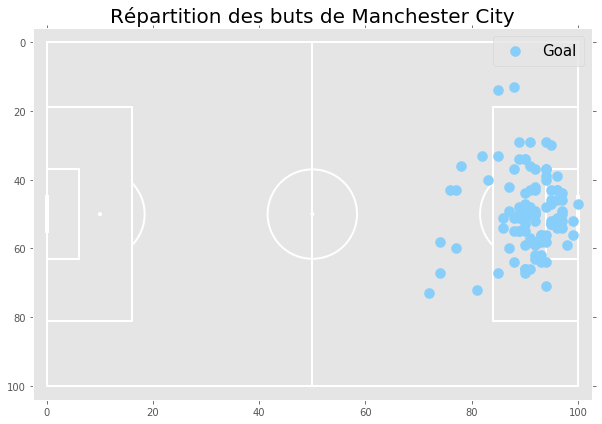

In [129]:
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')


pitch = Pitch(axis=True,
              label=True,
              tick=True,
              pitch_type='wyscout',
              figsize=(12, 6))

fig, ax = pitch.draw()

sc = pitch.scatter(x_coord, y_coord,
                   c='lightskyblue',
                   s=100, label='Goal', ax=ax)

leg = ax.legend(borderpad=0.5, markerscale=1, labelspacing=1.5, loc='best', fontsize=15)
tit = ax.set_title('Répartition des buts de Manchester City', fontsize=20)

# 5- Situation réelle

In [2]:
matches = pd.read_json('matches_England.json')

In [3]:
matches.shape

(380, 14)

In [4]:
matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [5]:
matches_mancity = matches[matches['label'].str.contains('Manchester City')]
matches_mancity.shape

(38, 14)

In [6]:
matches_mancity.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
6,Played,4405654,38,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",181150,2018-05-13 14:00:00,1625,St. Mary's Stadium,2500095,"Southampton - Manchester City, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385911, 'role': 'referee'}, {'r...",Regular,364
11,Played,4405654,31,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-09 19:00:00,1625,Etihad Stadium,2500024,"Manchester City - Brighton & Hove Albion, 3 - 1","May 9, 2018 at 9:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
18,Played,4405654,37,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",181150,2018-05-06 12:30:00,0,Etihad Stadium,2500085,"Manchester City - Huddersfield Town, 0 - 0","May 6, 2018 at 2:30:00 PM GMT+2","[{'refereeId': 385909, 'role': 'referee'}, {'r...",Regular,364
28,Played,4405654,36,"{'1633': {'scoreET': 0, 'coachId': 8235, 'side...",181150,2018-04-29 13:15:00,1625,London Stadium,2500078,"West Ham United - Manchester City, 1 - 4","April 29, 2018 at 3:15:00 PM GMT+2","[{'refereeId': 385915, 'role': 'referee'}, {'r...",Regular,364
37,Played,4405654,35,"{'10531': {'scoreET': 0, 'coachId': 32573, 'si...",181150,2018-04-22 15:30:00,1625,Etihad Stadium,2500065,"Manchester City - Swansea City, 5 - 0","April 22, 2018 at 5:30:00 PM GMT+2","[{'refereeId': 378951, 'role': 'referee'}, {'r...",Regular,364


In [7]:
#Liste contenant les id wyscout des 9 premiers matchs de City.
start = matches_mancity[matches_mancity['gameweek'] < 10]['wyId'].values.tolist()
start

[2499802,
 2499794,
 2499781,
 2499774,
 2499767,
 2499754,
 2499739,
 2499734,
 2499720]

In [8]:
events = pd.read_json('events_England.json')
events.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175


In [9]:
teams = pd.read_json('teams.json')

In [10]:
id_mancity = int(teams[teams['name'] == 'Manchester City']['wyId'])

In [11]:
#On récupère tous les events de Manchester City
events_mancity = events[events['teamId'] == id_mancity]
events_mancity.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296


In [12]:
#On créé un nouveau dataFrame : celui de tous les events de Manchester City sur les 9 premiers matchs
df = events_mancity[(events_mancity['matchId'] == start[0]) | (events_mancity['matchId'] == start[1]) |
                    (events_mancity['matchId'] == start[2]) | (events_mancity['matchId'] == start[3]) |
                    (events_mancity['matchId'] == start[4]) | (events_mancity['matchId'] == start[5]) |
                    (events_mancity['matchId'] == start[6]) | (events_mancity['matchId'] == start[7]) |
                    (events_mancity['matchId'] == start[8])]

In [13]:
df['matchId'].value_counts()

2499794    1130
2499802    1088
2499754    1059
2499720    1053
2499774    1035
2499739    1030
2499781    1019
2499767     975
2499734     869
Name: matchId, dtype: int64

In [14]:
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296


In [15]:
df.shape

(9258, 12)

In [16]:
df['teamId'].value_counts() 

1625    9258
Name: teamId, dtype: int64

In [17]:
#On créé la colonne 'goal' comme fait précédemment
s=0
l=[]
for tag in df['tags']:
    for i in tag:
        if i['id'] == 101:
            l.append(True)
            s=1
    if s==0:
        l.append(False)
    s=0
    
df['goal']=l

C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [81]:
#On sélectionne seulement les buts
df_goals = df[(df['goal']==True) & (df['subEventName'] != 'Reflexes') & (df['subEventName'] != 'Save attempt')]

In [82]:
df_goals.shape

(30, 13)

In [83]:
df_goals.index = pd.RangeIndex(len(df_goals.index))
df_goals

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
0,10,Shot,"[{'id': 101}, {'id': 1901}, {'id': 402}, {'id'...",8325,"[{'y': 55, 'x': 89}, {'y': 100, 'x': 100}]",2499720,Shot,1625,2H,1455.304065,100,178148575,True
1,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",11066,"[{'y': 49, 'x': 90}, {'y': 0, 'x': 0}]",2499734,Shot,1625,2H,2216.138172,100,180843201,True
2,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",340386,"[{'y': 51, 'x': 88}, {'y': 100, 'x': 100}]",2499739,Shot,1625,1H,1250.893682,100,182136124,True
3,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 1204}, {'id'...",11066,"[{'y': 55, 'x': 88}, {'y': 100, 'x': 100}]",2499739,Shot,1625,2H,3092.403842,100,182137532,True
4,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8325,"[{'y': 66, 'x': 90}, {'y': 0, 'x': 0}]",2499754,Shot,1625,1H,1440.596269,100,185703074,True
5,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",340386,"[{'y': 52, 'x': 95}, {'y': 0, 'x': 0}]",2499754,Shot,1625,1H,3010.214354,100,185703420,True
6,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",340386,"[{'y': 37, 'x': 92}, {'y': 0, 'x': 0}]",2499754,Shot,1625,2H,453.319838,100,185703640,True
7,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",245364,"[{'y': 37, 'x': 94}, {'y': 0, 'x': 0}]",2499754,Shot,1625,2H,1871.281100,100,185704194,True
8,10,Shot,"[{'id': 101}, {'id': 401}, {'id': 201}, {'id':...",245364,"[{'y': 60, 'x': 77}, {'y': 0, 'x': 0}]",2499754,Shot,1625,2H,2737.243355,100,185704462,True
9,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",8325,"[{'y': 43, 'x': 91}, {'y': 100, 'x': 100}]",2499767,Shot,1625,1H,1605.439738,100,188010927,True


In [84]:
#Grâce aux tags on connait la manière dont le but a été marqué.
#On créé une nouvelle colonne ['goal_type'] dans le dataFrame df_goals
l=[]
for tag in df_goals['tags']:
    for i in tag:
        if (i['id'] == 401) | (i['id'] == 402) | (i['id'] == 403):
            if i['id'] == 401:
                l.append('Left foot') 
            
            elif i['id'] == 402:
                l.append('Right foot')
            
            else:
                l.append('Head/Body')
    
df_goals['goal_type']=l

C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [85]:
df_goals.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,goal_type
0,10,Shot,"[{'id': 101}, {'id': 1901}, {'id': 402}, {'id'...",8325,"[{'y': 55, 'x': 89}, {'y': 100, 'x': 100}]",2499720,Shot,1625,2H,1455.304065,100,178148575,True,Right foot
1,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",11066,"[{'y': 49, 'x': 90}, {'y': 0, 'x': 0}]",2499734,Shot,1625,2H,2216.138172,100,180843201,True,Right foot
2,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",340386,"[{'y': 51, 'x': 88}, {'y': 100, 'x': 100}]",2499739,Shot,1625,1H,1250.893682,100,182136124,True,Right foot
3,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 1204}, {'id'...",11066,"[{'y': 55, 'x': 88}, {'y': 100, 'x': 100}]",2499739,Shot,1625,2H,3092.403842,100,182137532,True,Right foot
4,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",8325,"[{'y': 66, 'x': 90}, {'y': 0, 'x': 0}]",2499754,Shot,1625,1H,1440.596269,100,185703074,True,Right foot


In [86]:
#On stocke les coordonnées (x, y) de départ et d'arrivée pour chaque type de but
x_coord_left = []
y_coord_left = []
x_coord_right = []
y_coord_right = []
x_coord_head = []
y_coord_head = []
for pos, goal in zip(df_goals['positions'], df_goals['goal_type']):
    if goal == 'Right foot':
        y_coord_right.append(pos[0].get('y'))
        x_coord_right.append(pos[0].get('x'))
    elif goal == 'Left foot':
        y_coord_left.append(pos[0].get('y'))
        x_coord_left.append(pos[0].get('x'))
    else:
        y_coord_head.append(pos[0].get('y'))
        x_coord_head.append(pos[0].get('x'))

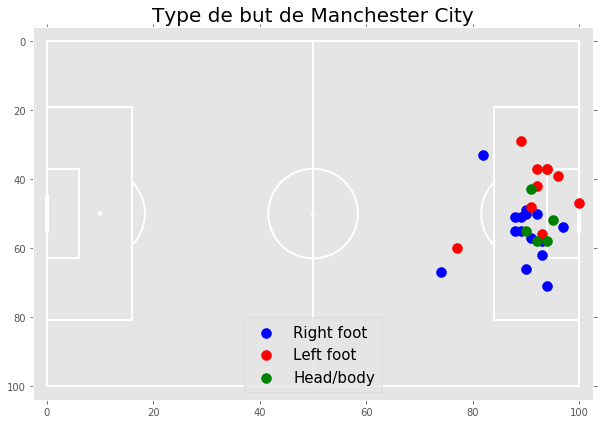

In [88]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from matplotlib import rcParams

rcParams['text.color'] = 'black'

pitch = Pitch(axis=True,
              label=True,
              tick=True,
              pitch_type='wyscout',
              figsize=(12, 6))

fig, ax = pitch.draw()

sc1 = pitch.scatter(x_coord_right, y_coord_right,
                   c='blue',
                   s=100, label='Right foot', ax=ax)

sc2 = pitch.scatter(x_coord_left, y_coord_left,
                   c='red',
                   s=100, label='Left foot', ax=ax)

sc3 = pitch.scatter(x_coord_head, y_coord_head,
                   c='green',
                   s=100, label='Head/body', ax=ax)

leg = ax.legend(borderpad=0.5, markerscale=1, labelspacing=0.5, loc='best', fontsize=15)
tit = ax.set_title('Type de but de Manchester City', fontsize=20)

In [48]:
df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,ball loss,opportunity
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False,False,False
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False,False,False
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False,False,False
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False,False,False
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138865,8,Smart pass,[{'id': 1802}],14808,"[{'y': 45, 'x': 74}, {'y': 30, 'x': 86}]",2499802,Pass,1625,2H,2826.962839,86,198519090,False,False,False
138867,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1210}, {'id'...",245364,"[{'y': 36, 'x': 83}, {'y': 0, 'x': 0}]",2499802,Shot,1625,2H,2829.688077,100,198519091,False,False,True
138870,1,Air duel,"[{'id': 703}, {'id': 1801}]",8464,"[{'y': 24, 'x': 30}, {'y': 11, 'x': 26}]",2499802,Duel,1625,2H,2861.891546,10,198519092,False,False,False
138872,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",70086,"[{'y': 11, 'x': 26}, {'y': 8, 'x': 17}]",2499802,Duel,1625,2H,2867.307363,11,198519093,False,False,False


In [49]:
df['subEventName'].value_counts()

Simple pass                5388
Ground attacking duel       599
Touch                       477
Ground defending duel       464
Ground loose ball duel      315
Air duel                    304
Head pass                   208
Throw in                    204
High pass                   198
Cross                       193
Smart pass                  162
Shot                        152
Foul                         78
Free Kick                    77
Clearance                    74
Acceleration                 73
Corner                       66
Ball out of the field        43
Hand pass                    42
Launch                       41
Goal kick                    32
                             13
Free kick cross              12
Goalkeeper leaving line      10
Free kick shot                8
Reflexes                      8
Save attempt                  7
Whistle                       3
Penalty                       2
Out of game foul              2
Protest                       1
Late car

In [50]:
df_passes = df[df['subEventName'].str.contains('pass')]

In [51]:
df_passes.shape

(5998, 15)

In [52]:
df_passes.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,ball loss,opportunity
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False,False,False
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False,False,False
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False,False,False
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False,False,False
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False,False,False


In [53]:
df_passes['subEventName'].value_counts()

Simple pass    5388
Head pass       208
High pass       198
Smart pass      162
Hand pass        42
Name: subEventName, dtype: int64

In [54]:
pass_start_x = []
pass_start_y = []
pass_end_x = []
pass_end_y = []

for event, pos in zip(df_passes['subEventName'], df_passes['positions']):
    if event == 'Smart pass':
        pass_start_y.append(pos[0].get('y'))
        pass_start_x.append(pos[0].get('x'))
        pass_end_y.append(pos[1].get('y'))
        pass_end_x.append(pos[1].get('x')) 

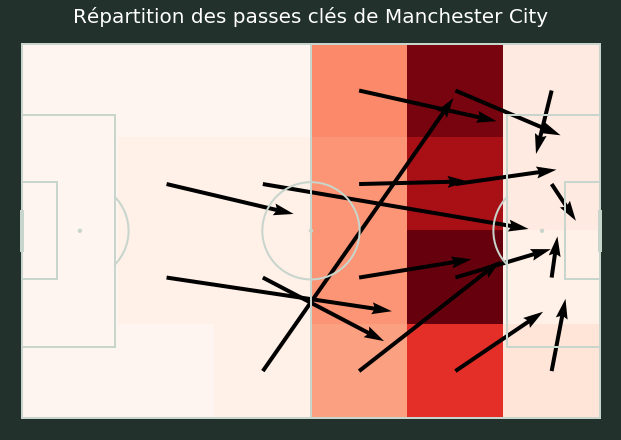

In [58]:
from mplsoccer.pitch import Pitch
from matplotlib import rcParams
from scipy.stats import circmean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

rcParams['text.color'] = '#c7d5cc'

pitch = Pitch(pitch_type='wyscout', orientation='horizontal', figsize=(12, 6), line_zorder=2,
              line_color='#c7d5cc', constrained_layout=True, tight_layout=False, pitch_color='#22312b')

bins = (6, 4)

fig, ax = pitch.draw()

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(pass_start_x, pass_start_y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')

# plot the pass flow map with a single color and the arrow length equal to the average distance in the cell
fm = pitch.flow(pass_start_x, pass_start_y, pass_end_x, pass_end_y, color='black',
                arrow_type='average', bins=bins, ax=ax)

ax.set_title('Répartition des passes clés de Manchester City', fontsize=20, color='white')
fig.set_facecolor('#22312b')

In [97]:
df_corner = df[df['subEventName'] == 'Corner']

In [98]:
df_corner

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
1888,3,Corner,[{'id': 1801}],38021,"[{'y': 100, 'x': 100}, {'y': 74, 'x': 84}]",2499720,Free Kick,1625,1H,331.965385,30,178147434,False
1923,3,Corner,"[{'id': 801}, {'id': 1802}]",38021,"[{'y': 0, 'x': 100}, {'y': 40, 'x': 93}]",2499720,Free Kick,1625,1H,408.869553,30,178147466,False
2047,3,Corner,"[{'id': 801}, {'id': 1801}]",8317,"[{'y': 0, 'x': 100}, {'y': 57, 'x': 90}]",2499720,Free Kick,1625,1H,790.981826,30,178147596,False
2170,3,Corner,"[{'id': 801}, {'id': 1801}]",38021,"[{'y': 100, 'x': 100}, {'y': 62, 'x': 91}]",2499720,Free Kick,1625,1H,1401.383496,30,178147733,False
2181,3,Corner,"[{'id': 801}, {'id': 1802}]",8317,"[{'y': 0, 'x': 100}, {'y': 38, 'x': 90}]",2499720,Free Kick,1625,1H,1432.584135,30,178147738,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125195,3,Corner,[{'id': 1802}],265673,"[{'y': 0, 'x': 100}, {'y': 0, 'x': 0}]",2499794,Free Kick,1625,2H,2885.368313,30,196256188,False
137540,3,Corner,[{'id': 1801}],38021,"[{'y': 100, 'x': 100}, {'y': 49, 'x': 74}]",2499802,Free Kick,1625,1H,832.072475,30,198517708,False
137544,3,Corner,"[{'id': 801}, {'id': 1801}]",8317,"[{'y': 0, 'x': 100}, {'y': 44, 'x': 88}]",2499802,Free Kick,1625,1H,857.413087,30,198517711,False
138375,3,Corner,[{'id': 1801}],38021,"[{'y': 100, 'x': 100}, {'y': 82, 'x': 83}]",2499802,Free Kick,1625,2H,1149.899592,30,198518555,False


In [99]:
pass_start_x = []
pass_start_y = []
pass_end_x = []
pass_end_y = []

for pos in df_corner['positions']:
    pass_start_y.append(pos[0].get('y'))
    pass_start_x.append(pos[0].get('x'))
    pass_end_y.append(pos[1].get('y'))
    pass_end_x.append(pos[1].get('x')) 

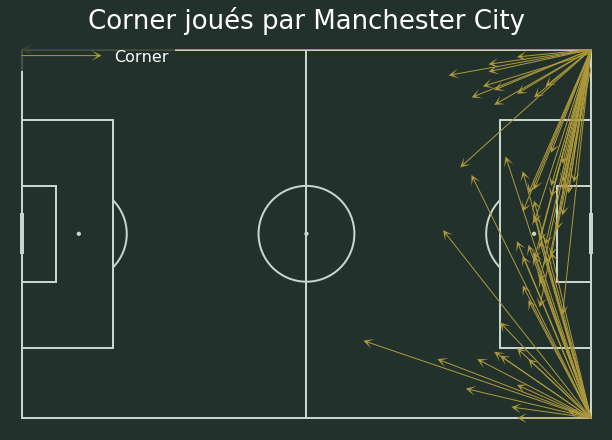

In [100]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from matplotlib import rcParams
plt.style.use('ggplot')

rcParams['text.color']='white'

# Setup the pitch
pitch = Pitch(pitch_type='wyscout', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(12, 6),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

# Plot the completed passes
pitch.arrows(pass_start_x, pass_start_y,
             pass_end_x, pass_end_y, width=1,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Corner')

# setup the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='none', fontsize=16, loc='best')

# Set the title
ax.set_title('Corner joués par Manchester City', fontsize=26, color='white')

# Set the figure facecolor
fig.set_facecolor('#22312b')

In [101]:
df_freekick = df[df['subEventName'].str.contains('Free')]
df_freekick.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
2070,3,Free Kick,[{'id': 1801}],0,"[{'y': 30, 'x': 43}, {'y': 30, 'x': 38}]",2499720,Free Kick,1625,1H,918.314826,31,178147619,False
2084,3,Free kick shot,"[{'id': 402}, {'id': 1101}, {'id': 201}, {'id'...",38021,"[{'y': 33, 'x': 76}, {'y': 100, 'x': 100}]",2499720,Free Kick,1625,1H,995.894670,33,178147638,False
2213,3,Free Kick,[{'id': 1802}],0,"[{'y': 9, 'x': 36}, {'y': 100, 'x': 68}]",2499720,Free Kick,1625,1H,1518.105864,31,178148103,False
2254,3,Free kick shot,"[{'id': 402}, {'id': 1101}, {'id': 2101}, {'id...",38021,"[{'y': 29, 'x': 77}, {'y': 100, 'x': 100}]",2499720,Free Kick,1625,1H,1873.311156,33,178147796,False
2335,3,Free Kick,[{'id': 1801}],105339,"[{'y': 68, 'x': 48}, {'y': 68, 'x': 44}]",2499720,Free Kick,1625,1H,2165.618296,31,178147893,False


In [102]:
df_freekick.shape

(97, 13)

In [103]:
df_freekick['goal'].value_counts() #aucun but sur coup franc direct

False    97
Name: goal, dtype: int64

In [104]:
pass_start_x = []
pass_start_y = []
pass_end_x = []
pass_end_y = []

for pos in df_freekick['positions']:
    pass_start_y.append(pos[0].get('y'))
    pass_start_x.append(pos[0].get('x'))
    pass_end_y.append(pos[1].get('y'))
    pass_end_x.append(pos[1].get('x')) 

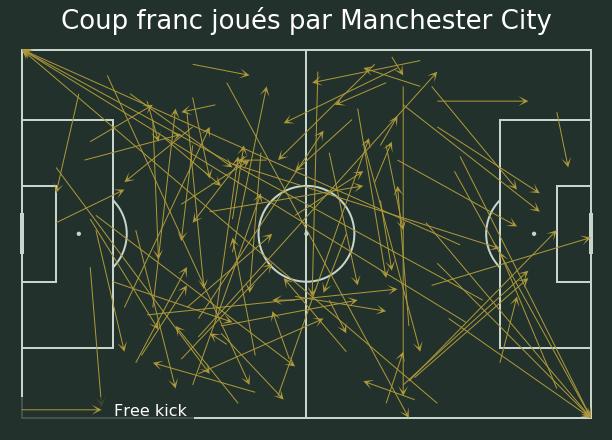

In [105]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from matplotlib import rcParams
plt.style.use('ggplot')

rcParams['text.color']='white'

# Setup the pitch
pitch = Pitch(pitch_type='wyscout', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(12, 6),
              constrained_layout=True, tight_layout=False)

fig, ax = pitch.draw()

# Plot the completed passes
pitch.arrows(pass_start_x, pass_start_y,
             pass_end_x, pass_end_y, width=1,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Free kick')

# setup the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='none', fontsize=16, loc='best')

# Set the title
ax.set_title('Coup franc joués par Manchester City', fontsize=26, color='white')

# Set the figure facecolor
fig.set_facecolor('#22312b')

In [116]:
df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,assist
0,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False,False
1,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False,False
2,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False,False
3,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False,False
4,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,8,Smart pass,[{'id': 1802}],14808,"[{'y': 45, 'x': 74}, {'y': 30, 'x': 86}]",2499802,Pass,1625,2H,2826.962839,86,198519090,False,False
9254,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1210}, {'id'...",245364,"[{'y': 36, 'x': 83}, {'y': 0, 'x': 0}]",2499802,Shot,1625,2H,2829.688077,100,198519091,False,False
9255,1,Air duel,"[{'id': 703}, {'id': 1801}]",8464,"[{'y': 24, 'x': 30}, {'y': 11, 'x': 26}]",2499802,Duel,1625,2H,2861.891546,10,198519092,False,False
9256,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",70086,"[{'y': 11, 'x': 26}, {'y': 8, 'x': 17}]",2499802,Duel,1625,2H,2867.307363,11,198519093,False,False


In [117]:
df.index = pd.RangeIndex(len(df.index))
df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,assist
0,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False,False
1,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False,False
2,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False,False
3,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False,False
4,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,8,Smart pass,[{'id': 1802}],14808,"[{'y': 45, 'x': 74}, {'y': 30, 'x': 86}]",2499802,Pass,1625,2H,2826.962839,86,198519090,False,False
9254,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1210}, {'id'...",245364,"[{'y': 36, 'x': 83}, {'y': 0, 'x': 0}]",2499802,Shot,1625,2H,2829.688077,100,198519091,False,False
9255,1,Air duel,"[{'id': 703}, {'id': 1801}]",8464,"[{'y': 24, 'x': 30}, {'y': 11, 'x': 26}]",2499802,Duel,1625,2H,2861.891546,10,198519092,False,False
9256,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",70086,"[{'y': 11, 'x': 26}, {'y': 8, 'x': 17}]",2499802,Duel,1625,2H,2867.307363,11,198519093,False,False


In [122]:
#Les passes décisives sont identifiées grâce au tag 301.
s=0
l=[]
for tag in df['tags']:
    for i in tag:
        if i['id'] == 301:
            l.append(True)
            s=1
    if s==0:
        l.append(False)
    s=0
df['assist']=l

C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [123]:
df_assists = df[df['assist'] == True]
df_assists.shape

(25, 14)

In [124]:
pass_start_x = []
pass_start_y = []
pass_end_x = []
pass_end_y = []

for pos in df_assists['positions']:
    pass_start_y.append(pos[0].get('y'))
    pass_start_x.append(pos[0].get('x'))
    pass_end_y.append(pos[1].get('y'))
    pass_end_x.append(pos[1].get('x')) 

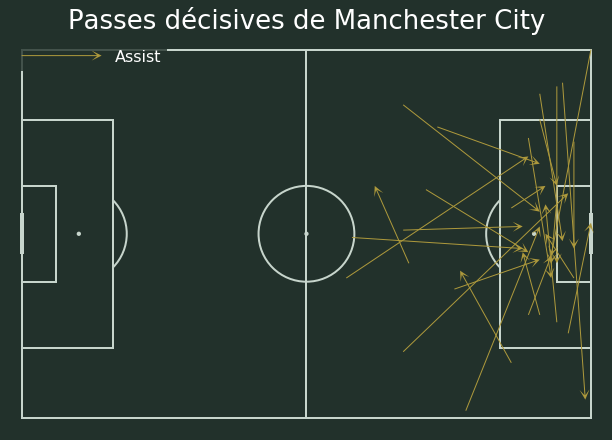

In [125]:
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from matplotlib import rcParams
plt.style.use('ggplot')

rcParams['text.color']='white'

# Setup the pitch
pitch = Pitch(pitch_type='wyscout', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(12, 6),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

# Plot the completed passes
pitch.arrows(pass_start_x, pass_start_y,
             pass_end_x, pass_end_y, width=1,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='Assist')

# setup the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='none', fontsize=16, loc='best')

# Set the title
ax.set_title('Passes décisives de Manchester City', fontsize=26, color='white')

# Set the figure facecolor
fig.set_facecolor('#22312b')

In [59]:
#On garde seulement les events relatifs à des passes (id 8)
df_passes = df[df['eventId'] == 8]

In [60]:
df_passes.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,ball loss,opportunity
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False,False,False
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False,False,False
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False,False,False
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False,False,False
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False,False,False


In [61]:
df_passes.shape

(6232, 15)

In [62]:
pass_start_x = []
pass_start_y = []
pass_end_x = []
pass_end_y = []

for pos in df_passes['positions']:
    pass_start_y.append(pos[0].get('y'))
    pass_start_x.append(pos[0].get('x'))
    pass_end_y.append(pos[1].get('y'))
    pass_end_x.append(pos[1].get('x'))

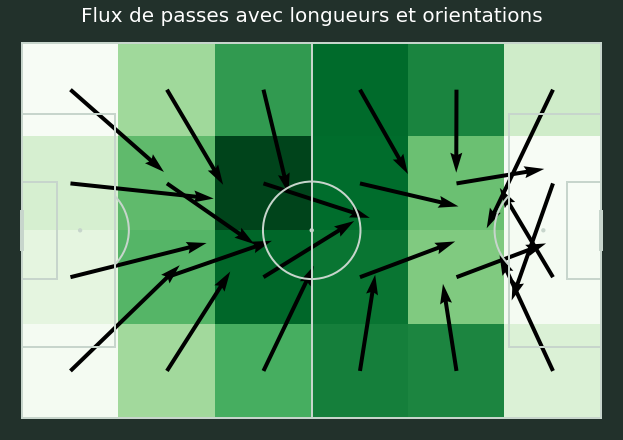

In [63]:
from mplsoccer.pitch import Pitch
from matplotlib import rcParams
from scipy.stats import circmean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

rcParams['text.color'] = '#c7d5cc'

pitch = Pitch(pitch_type='wyscout', orientation='horizontal', figsize=(12, 6), line_zorder=2,
              line_color='#c7d5cc', constrained_layout=True, tight_layout=False, pitch_color='#22312b')

bins = (6, 4)

fig, ax = pitch.draw()

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(pass_start_x, pass_start_y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')

# plot the pass flow map with a single color and the arrow length equal to the average distance in the cell
fm = pitch.flow(pass_start_x, pass_start_y, pass_end_x, pass_end_y, color='black',
                arrow_type='average', bins=bins, ax=ax)

ax.set_title('Flux de passes avec longueurs et orientations', fontsize=20, color='white')
fig.set_facecolor('#22312b')

In [18]:
df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal
1768,8,Simple pass,[{'id': 1801}],8325,"[{'y': 53, 'x': 49}, {'y': 51, 'x': 36}]",2499720,Pass,1625,1H,3.358676,85,178147292,False
1769,8,Simple pass,[{'id': 1801}],105339,"[{'y': 51, 'x': 36}, {'y': 30, 'x': 28}]",2499720,Pass,1625,1H,5.108462,85,178147293,False
1770,8,Simple pass,[{'id': 1801}],70086,"[{'y': 30, 'x': 28}, {'y': 79, 'x': 28}]",2499720,Pass,1625,1H,7.758945,85,178147294,False
1771,8,Simple pass,[{'id': 1801}],8307,"[{'y': 79, 'x': 28}, {'y': 24, 'x': 28}]",2499720,Pass,1625,1H,11.267789,85,178147295,False
1772,8,Simple pass,[{'id': 1801}],70086,"[{'y': 24, 'x': 28}, {'y': 52, 'x': 38}]",2499720,Pass,1625,1H,15.599964,85,178147296,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138865,8,Smart pass,[{'id': 1802}],14808,"[{'y': 45, 'x': 74}, {'y': 30, 'x': 86}]",2499802,Pass,1625,2H,2826.962839,86,198519090,False
138867,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1210}, {'id'...",245364,"[{'y': 36, 'x': 83}, {'y': 0, 'x': 0}]",2499802,Shot,1625,2H,2829.688077,100,198519091,False
138870,1,Air duel,"[{'id': 703}, {'id': 1801}]",8464,"[{'y': 24, 'x': 30}, {'y': 11, 'x': 26}]",2499802,Duel,1625,2H,2861.891546,10,198519092,False
138872,1,Ground attacking duel,"[{'id': 701}, {'id': 1802}]",70086,"[{'y': 11, 'x': 26}, {'y': 8, 'x': 17}]",2499802,Duel,1625,2H,2867.307363,11,198519093,False


In [19]:
s=0
l=[]
for tag in df['tags']:
    for i in tag:
        if i['id'] == 2001:
            l.append(True)
            s=1
    if s==0:
        l.append(False)
    s=0

df['ball loss']=l

C:\Users\alexa\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [21]:
df_loss = df[df['ball loss'] == True]

In [22]:
df_loss.shape

(11, 14)

In [23]:
df_loss

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,goal,ball loss
2564,8,Simple pass,"[{'id': 2001}, {'id': 1802}]",8307,"[{'y': 71, 'x': 38}, {'y': 61, 'x': 51}]",2499720,Pass,1625,2H,104.573733,85,178148146,False,True
32609,8,Simple pass,"[{'id': 2001}, {'id': 1802}]",105339,"[{'y': 31, 'x': 33}, {'y': 42, 'x': 34}]",2499739,Pass,1625,1H,669.923569,85,182135878,False,True
34048,1,Ground attacking duel,"[{'id': 2001}, {'id': 701}, {'id': 1802}]",26136,"[{'y': 54, 'x': 43}, {'y': 55, 'x': 36}]",2499739,Duel,1625,2H,3041.589866,11,182137513,False,True
57225,1,Ground attacking duel,"[{'id': 2001}, {'id': 501}, {'id': 701}, {'id'...",8325,"[{'y': 97, 'x': 63}, {'y': 93, 'x': 64}]",2499754,Duel,1625,1H,1612.379830,11,185703116,False,True
79029,8,Simple pass,"[{'id': 2001}, {'id': 1802}]",9380,"[{'y': 70, 'x': 29}, {'y': 67, 'x': 42}]",2499767,Pass,1625,1H,2707.487497,85,188011127,False,True
79505,8,Simple pass,"[{'id': 2001}, {'id': 1802}]",8277,"[{'y': 99, 'x': 55}, {'y': 94, 'x': 52}]",2499767,Pass,1625,2H,1521.083549,85,188079629,False,True
101712,8,Simple pass,"[{'id': 2001}, {'id': 1802}]",8277,"[{'y': 87, 'x': 35}, {'y': 60, 'x': 46}]",2499781,Pass,1625,1H,753.307030,85,192259286,False,True
102257,1,Ground attacking duel,"[{'id': 2001}, {'id': 701}, {'id': 1802}]",38021,"[{'y': 84, 'x': 55}, {'y': 77, 'x': 40}]",2499781,Duel,1625,1H,2503.654769,11,192259862,False,True
102478,1,Ground attacking duel,"[{'id': 2001}, {'id': 701}, {'id': 1802}]",340386,"[{'y': 55, 'x': 48}, {'y': 54, 'x': 36}]",2499781,Duel,1625,2H,390.925424,11,192260067,False,True
102616,8,Simple pass,"[{'id': 2001}, {'id': 1802}]",340386,"[{'y': 91, 'x': 39}, {'y': 58, 'x': 32}]",2499781,Pass,1625,2H,880.102483,85,192260213,False,True


In [25]:
ball_loss_x = []
ball_loss_y = []

for pos in df_loss['positions']:
    ball_loss_y.append(pos[0].get('y'))
    ball_loss_x.append(pos[0].get('x'))

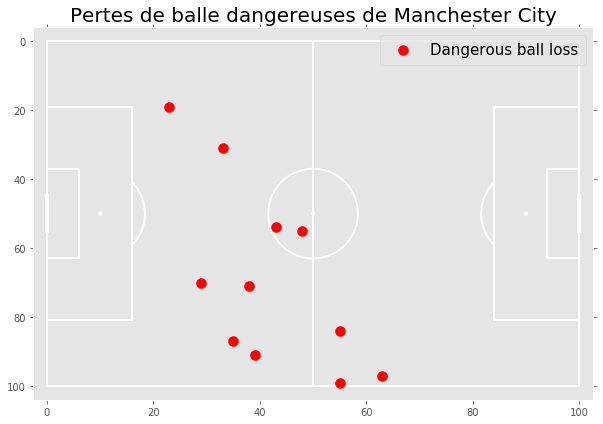

In [30]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
plt.style.use('ggplot')


pitch = Pitch(axis=True,
              label=True,
              tick=True,
              pitch_type='wyscout',
              figsize=(12, 6))

fig, ax = pitch.draw()

sc = pitch.scatter(ball_loss_x, ball_loss_y,
                   c='red',
                   s=100, label='Dangerous ball loss', ax=ax)

leg = ax.legend(borderpad=0.5, markerscale=1, labelspacing=1.5, loc='best', fontsize=15)
tit = ax.set_title('Pertes de balle dangereuses de Manchester City', fontsize=20)